# Physics 300 
## Computational Physics I (Fall 2017)
## BPB-248, Tues/Thurs 10:00 - 11:15 am 

|Instructor| Prof. Qiang Zhu|
|--|-------------------------------|
|Email | qiang.zhu@unlv.edu|
|Website|http://www.physics.unlv.edu/~qzhu/|
|Office| BPB 232|
|Office hours | Tues/Thurs 8:30 - 10:00 |

# 18 Local Optmization (II)

## 18.1 Gradient descent on 2D


Let's continue our journey in optimization. If we extend the gradient descent algorithm to two-variables system. How shall we implements it.

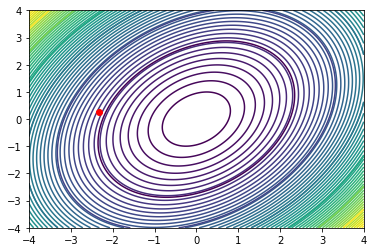

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x): #simple function with 1 minimum
    return x[0]**2/2 + x[1]**2/3 - x[0]*x[1]/4 # + 3* np.exp(-x[0]**2)

def f2(x): #complex function with 2 minimum
    return x[0]**2/2 + x[1]**2/3 - x[0]*x[1]/4 + 3* np.exp(-x[0]**2)
    #return (1-x[0])**2 + 100*(x[1]-x[0]**2)**2

#def f2(x):
#    p = np.exp(-(x[0]/4-x[1]/1)**2)
#    return p

def init(x_min, x_max, y_min, y_max):
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return [x0, y0]

x_min, x_max = -4, 4
y_min, y_max = -4, 4                   

nx = np.linspace(x_min,x_max,400)
ny = np.linspace(y_min,y_max,400)

x,y = np.meshgrid(nx,ny)
z = f1([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)


x0, y0 = init(x_min, x_max, y_min, y_max)
plt.plot(x0, y0, 'ro')
plt.show()


### 18.2 Gradient descent with fixed step size

In [2]:
# variable stepwidth
def derivative2(f, xy, d=0.01):
    x, y = xy[0], xy[1]
    fx = (f([x+d/2,y])-f([x-d/2,y]))/d
    fy = (f([x,y+d/2])-f([x,y-d/2]))/d
    #print(fx,fy)
    return np.array([fx,fy])

def minimize_fix(f,x0, N=1000):
    """
    x0: 1*2 array
    """
    
    x_now = x0
    converged = False
    x_hist = []
    x_hist.append(x_now)
    dx = 0.05

    for i in range(N):
        
        df_now = derivative2(f, x_now) 
        x_next = x_now - df_now*dx
        
        #print("step:    ", f(x_now), f(x_next))
        if f(x_next)>f(x_now):
            converged = True
            break
        else:
            x_now = x_next
            x_hist.append(x_now)

    return converged, np.array(x_hist), f(x_now)

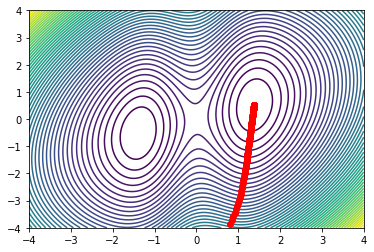

results of f_min:  1.3096216675   number of iterations:   465
[ 0.80608972 -3.85577662] 7.62406783581
[ 1.37484755  0.51556678] 1.3096216675


In [3]:
[x0, y0] = init(x_min, x_max, y_min, y_max)
converged, x_hist, f_min = minimize_fix(f2, [x0,y0])
x,y = np.meshgrid(nx,ny)
z = f2([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)

plt.plot(x_hist[:,0], x_hist[:,1], 'ro-')
plt.show()
print('results of f_min: ', f_min, '  number of iterations:  ', len(x_hist))
print(x_hist[0], f2(x_hist[0]))
print(x_hist[-1], f2(x_hist[-1]))


### 18.3 Gradient descent with variable step size

In [4]:
def minimize_var(f,x0, N=1000):
    """
    x0: 1*2 array
    """
    
    x_now = x0
    x_prev = None
    converged = False
    x_hist = []
    x_hist.append(x_now)
    for i in range(N):
        
        df_now = derivative2(f2, x_now) 
        
        if x_prev is None:
            dx = 0.01
        else:
            df_prev = derivative2(f2, x_prev)
            dd = df_now - df_prev
            dx = np.dot(x_now - x_prev, dd) / (np.linalg.norm(dd))**2
        x_next = x_now - df_now*dx
        
        print("step:    ", f(x_now), f(x_next))
        if f(x_next)>f(x_now):
            converged = True
            break
        else:
            x_prev = x_now
            x_now = x_next
            x_hist.append(x_now)

    return converged, np.array(x_hist), f(x_now)

step:     6.07332813577 5.97078136101
step:     5.97078136101 2.91895085233
step:     2.91895085233 1.62596067701
step:     1.62596067701 1.3692748819
step:     1.3692748819 1.34419481937
step:     1.34419481937 1.32789131275
step:     1.32789131275 1.31133353428
step:     1.31133353428 1.31251824092


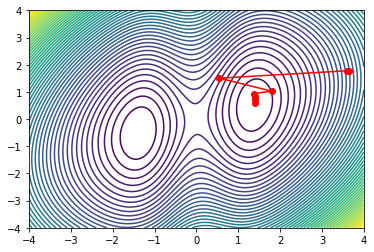

results of f_min:  1.31133353428   number of iterations:   8
[ 3.64360226  1.78243676] 6.07332813577
[ 1.3917612  0.5824901] 1.31133353428


In [39]:
[x0, y0] = init(x_min, x_max, y_min, y_max)
converged, x_hist, f_min = minimize_var(f2, [x0,y0])
x,y = np.meshgrid(nx,ny)
z = f2([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)

plt.plot(x_hist[:,0], x_hist[:,1], 'ro-')
plt.show()
print('results of f_min: ', f_min, '  number of iterations:  ', len(x_hist))
print(x_hist[0], f2(x_hist[0]))
print(x_hist[-1], f2(x_hist[-1]))


## 18.4 Other methods
### 18.4.1 Conjungate Gradient
As you have seen in the gradient descent method the algorihtm makes steps in same direction several times. 
$$ d_0 = \gamma \nabla f(x_0)$$

Here’s an idea: let’s pick a set of orthoginal search directions so that if we take exactly one step of right length in each of those directions we will reach the minimum. In order to rectify this, we require that our directions be conjugate to one another.

$$ d_1 = \nabla f(x_1) + \beta_0d_0$$


## 18.5 Minimization Packages in Scipy


In [45]:
from scipy.optimize import minimize

[x0, y0] = init(x_min, x_max, y_min, y_max)
res = minimize(f2, [x0,y0], method='nelder-mead', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 1.309622
         Iterations: 43
         Function evaluations: 83


In [48]:
res = minimize(f2, [x0,y0], method='CG', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 1.309622
         Iterations: 9
         Function evaluations: 60
         Gradient evaluations: 15


In [49]:
res = minimize(f2, [x0,y0], method='BFGS', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 1.309622
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 6


In [50]:
res = minimize(f2, [x0,y0], method='powell', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 1.309622
         Iterations: 3
         Function evaluations: 91


## 18.6 Homework

Write a program to find the minium of 
    $$ f(x,y) = x^2/2 + y^2/3 - xy/4 $$
    
- 1, from your own code (except Monte Carlo)
- 2, from scipy